In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt
import os
import warnings
from keras.layers import Input, Embedding, Flatten, Dot, Dense
from keras.models import Model
warnings.filterwarnings('ignore')

In [ ]:
dataset1 = pd.read_csv('/content/drive/MyDrive/ratings.csv')
read=pd.read_csv('/content/drive/MyDrive/books.csv')

In [ ]:
n_u = len(dataset1.user_id.unique())

In [ ]:
n_b = len(dataset1.book_id.unique())

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(dataset1, test_size=0.2, random_state=42)

In [ ]:
from keras.layers import Concatenate

books = keras.layers.Input(shape=[1])
embed1 = keras.layers.Embedding(n_b+1, 5)(books)
vector1 = keras.layers.Flatten()(embed1)

users = keras.layers.Input(shape=[1])
emebd2 = keras.layers.Embedding(n_u+1, 5)(users)
vector2 = keras.layers.Flatten(name="count")(emebd2)
l=[vector1, vector2]
concat = Concatenate()(l)

layer1 = keras.layers.Dense(128, activation='relu')(concat)
layer2 = keras.layers.Dense(32, activation='relu')(layer1)
display = keras.layers.Dense(1)(layer2)

model = Model([users, books], display)
model.compile('adam', 'mean_squared_error',metrics=[keras.metrics.RootMeanSquaredError()])

Epoch 1/3
24544/24544 [==============================] - 96s 4ms/step - loss: 0.8022 - root_mean_squared_error: 0.8957
Epoch 2/3
24544/24544 [==============================] - 96s 4ms/step - loss: 0.6872 - root_mean_squared_error: 0.8290
Epoch 3/3
24544/24544 [==============================] - 98s 4ms/step - loss: 0.6576 - root_mean_squared_error: 0.8109


Text(0, 0.5, 'Training Error')

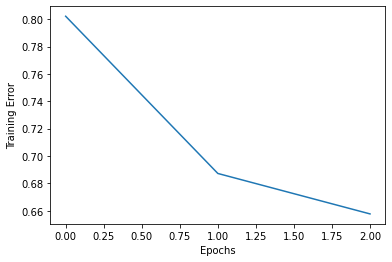

In [ ]:
    history = model.fit([train.user_id, train.book_id], train.rating, epochs=3, verbose=1)
    plt.plot(history.history['loss'])
    plt.xlabel("Epochs")
    plt.ylabel("Training Error")

In [ ]:
# import random
# userninput = np.array(list(set(dataset1.book_id)))
# random.shuffle(userninput)
#enable for random picks

In [ ]:
userninput = np.array(list(set(dataset1.book_id)))

In [ ]:
user = np.array([1 for i in range(len(userninput))])

In [ ]:
pred = model.predict([user, userninput])

pred = np.array([a[0] for a in pred])

rbi = (-pred).argsort()[:5]

In [ ]:
x=read[read['id'].isin(rbi)]

In [ ]:
x

,id,book_id,isbn,authors,title
133,134,3777732,1416914307,Cassandra Clare,"City of Glass (The Mortal Instruments, #3)"
385,386,233818,440439884,Scott O'Dell,Island of the Blue Dolphins (Island of the Blu...
1682,1683,1171,140143459,Michael Lewis,Liar's Poker
7083,7084,25802884,NaN,Alessandra Torre,"Hollywood Dirt (Hollywood Dirt, #1)"
8364,8365,21416690,1447256239,Genevieve Cogman,"The Invisible Library (The Invisible Library, #1)"
